In [55]:
# import modules
import pandas as pd
pd.options.display.max_colwidth=500
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import typing
nltk.download('stopwords')
nltk.download('wordnet')
import re
#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
#packages to build our knn model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
     # Enter your own credentials obtained
        # from your developer account
        consumer_key = "AKJRvPwuZS686p1dxkTx3WDnV"
        consumer_secret = "MZ2dakCiJtGBzBkpfTVMFHIlPlwJjYV1bOZg5RN0qIRKxi8d6i"
        access_key = "1498368813867413505-CosP8pC5BUHY9W730ZbjcNhaA9Gk0m"
        access_secret = "eBAL5p7c4DYZVGsIPpRYHQObsAt1HEBsomcGYjUEAwT47"
 

In [57]:
alltweets = []
# Defining the function to get the tweets
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    totaltweets = [[tweet.created_at,tweet._json["user"]["name"],tweet.user.description,tweet.user.statuses_count,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.lang,tweet.user.friends_count,tweet.user.followers_count,tweet.retweet_count,tweet.retweeted,tweet.text,
                  tweet._json["user"]["location"]] for tweet in alltweets]
     
    tweets_df = pd.DataFrame(columns = ["time","name","totaltweets","description","hashtags","user_mentions","favorite_count",
                                    "lang","following","followers_count","retweet_count","retweeted",
                                    "text","location"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in totaltweets])
    tweets_df["name"] = pd.Series([str(i[1]) for i in totaltweets])
    tweets_df["description"] = pd.Series([str(i[2]) for i in totaltweets])
    tweets_df["totaltweets"] = pd.Series([str(i[3]) for i in totaltweets])            
    tweets_df["hashtags"] = pd.Series([str(i[4]) for i in totaltweets])
    tweets_df["user_mentions"] = pd.Series([str(i[5]) for i in totaltweets])
    tweets_df["favorite_count"] = pd.Series([str(i[6]) for i in totaltweets])
    tweets_df["lang"] = pd.Series([str(i[7]) for i in totaltweets])
    tweets_df["following"] = pd.Series([str(i[8]) for i in totaltweets])
    tweets_df["followers_count"] = pd.Series([str(i[9]) for i in totaltweets])
    tweets_df["retweet_count"] = pd.Series([str(i[10]) for i in totaltweets])
    tweets_df["retweeted"] = pd.Series([str(i[11]) for i in totaltweets])
    tweets_df["text"] = pd.Series([str(i[12]) for i in totaltweets])
    tweets_df["location"] = pd.Series([str(i[13]) for i in totaltweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [58]:
anderstweets = get_all_tweets("@andersostlund")

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...1400 tweets downloaded so far
...1600 tweets downloaded so far
...1800 tweets downloaded so far
...1999 tweets downloaded so far
...2199 tweets downloaded so far
...2399 tweets downloaded so far
...2599 tweets downloaded so far
...2799 tweets downloaded so far
...2999 tweets downloaded so far
...3199 tweets downloaded so far
...3248 tweets downloaded so far
...3248 tweets downloaded so far


In [59]:
anderstweets.head()

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
0,2022-05-02 11:45:53+00:00,Anders Östlund,55976,"Swede by birth, European by choice.\nLive in Kyiv. Interested in geopolitics. \nNon resident fellow at @cepa.\nI try to reply to comments but time is a constraint.",[],[],322,en,17219,245397,63,False,True. Russian culture and thinking have been forced on Ukrainians for centuries while Russia despise anything Ukrai… https://t.co/iWYn4Y1V9c,Sweden Ukraine Europe
1,2022-05-02 10:38:44+00:00,Anders Östlund,55976,"Swede by birth, European by choice.\nLive in Kyiv. Interested in geopolitics. \nNon resident fellow at @cepa.\nI try to reply to comments but time is a constraint.",[],[],164,en,17219,245397,12,False,It's also important to remember that Israel's enemies were always dictatorships and they always had very cruel plan… https://t.co/b4Ht6aLiWm,Sweden Ukraine Europe
2,2022-05-02 10:35:04+00:00,Anders Östlund,55976,"Swede by birth, European by choice.\nLive in Kyiv. Interested in geopolitics. \nNon resident fellow at @cepa.\nI try to reply to comments but time is a constraint.",[],[],256,en,17219,245397,32,False,Israel was attacked by numerically superior enemies again and again but was still accused by the European left of b… https://t.co/TRkttLSfS9,Sweden Ukraine Europe
3,2022-05-02 10:31:25+00:00,Anders Östlund,55976,"Swede by birth, European by choice.\nLive in Kyiv. Interested in geopolitics. \nNon resident fellow at @cepa.\nI try to reply to comments but time is a constraint.",[],[],242,en,17219,245397,36,False,"I would like to be bold and connect the letter writing ""intellectuals"" with Lavrov's antisemitism. As far as I reme… https://t.co/4XOPON3bH5",Sweden Ukraine Europe
4,2022-05-02 10:15:51+00:00,Anders Östlund,55976,"Swede by birth, European by choice.\nLive in Kyiv. Interested in geopolitics. \nNon resident fellow at @cepa.\nI try to reply to comments but time is a constraint.",[],[],732,en,17219,245397,149,False,"Russia do what it can to make new enemies:\n""Sergei Lavrov said the fact that President Zelenskyy is Jewish does not… https://t.co/XPS3R6aG1H",Sweden Ukraine Europe


In [60]:
anderstweets.describe(exclude='number')

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
count,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248
unique,3241,1,2,1,133,973,1287,16,1,1,1107,1,3216,1
top,2022-04-21 12:29:23+00:00,Anders Östlund,55977,"Swede by birth, European by choice.\nLive in Kyiv. Interested in geopolitics. \nNon resident fellow at @cepa.\nI try to reply to comments but time is a constraint.",[],[],0,en,17219,245397,0,False,Air raid in Kyiv.,Sweden Ukraine Europe
freq,2,3248,2048,3248,3112,1654,909,2976,3248,3248,351,3248,19,3248


In [61]:
anderstweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time             3248 non-null   object
 1   name             3248 non-null   object
 2   totaltweets      3248 non-null   object
 3   description      3248 non-null   object
 4   hashtags         3248 non-null   object
 5   user_mentions    3248 non-null   object
 6   favorite_count   3248 non-null   object
 7   lang             3248 non-null   object
 8   following        3248 non-null   object
 9   followers_count  3248 non-null   object
 10  retweet_count    3248 non-null   object
 11  retweeted        3248 non-null   object
 12  text             3248 non-null   object
 13  location         3248 non-null   object
dtypes: object(14)
memory usage: 355.4+ KB


In [62]:
anderstweets['hashtags'].value_counts().loc[lambda x : x>1].to_frame()

,hashtags
[],3112
"[{'text': 'BREAKING', 'indices': [9, 18]}]",3
"[{'text': 'Russia', 'indices': [46, 53]}]",2
"[{'text': 'Ukraine', 'indices': [15, 23]}]",2


In [63]:
anderstweets['user_mentions'].value_counts().loc[lambda x : x>50].to_frame()

,user_mentions
[],1654
"[{'screen_name': 'EuromaidanPress', 'name': 'Euromaidan Press', 'id': 2595088842, 'id_str': '2595088842', 'indices': [3, 19]}]",59
"[{'screen_name': 'IAPonomarenko', 'name': 'Illia Ponomarenko 🇺🇦', 'id': 262219168, 'id_str': '262219168', 'indices': [3, 17]}]",53


In [93]:
#which tweet got the most like
print(anderstweets['favorite_count'].max())
anderstweets.loc[anderstweets['favorite_count'] == anderstweets['favorite_count'].max()]['text']

54398


1713    Went out to get gasoline today. 20 liters maximum. Drove some 15 km in Kyiv and then back again. Without going into… https://t.co/26kBwoSLYh
Name: text, dtype: object

In [94]:
#which tweet got the most like
print(anderstweets['retweet_count'].max())
anderstweets.loc[anderstweets['retweet_count'] == anderstweets['retweet_count'].max()]['text']

74155


2561    RT @ZelenskyyUa: To the world: what is the point of saying «never again» for 80 years, if the world stays silent when a bomb drops on the s…
Name: text, dtype: object

In [66]:
sid_analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

# Get Sentiment scores
def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
    return df
#find all top scoring tweets
def print_top_n_tweets(df,data_column,number_of_rows):
    for index,row in df.nlargest(number_of_rows,data_column).iterrows():
        print(f"Score: {row[data_column]}, Tweet: {row[0]}")

In [67]:
anderstweets = get_sentiment_scores(anderstweets,'text')
tweet_sentiment = anderstweets[['text','text Positive Sentiment Score','text Negative Sentiment Score']]

In [68]:
tweet_sentiment.head()

,text,text Positive Sentiment Score,text Negative Sentiment Score
0,True. Russian culture and thinking have been forced on Ukrainians for centuries while Russia despise anything Ukrai… https://t.co/iWYn4Y1V9c,0.121,0.233
1,It's also important to remember that Israel's enemies were always dictatorships and they always had very cruel plan… https://t.co/b4Ht6aLiWm,0.072,0.291
2,Israel was attacked by numerically superior enemies again and again but was still accused by the European left of b… https://t.co/TRkttLSfS9,0.086,0.264
3,"I would like to be bold and connect the letter writing ""intellectuals"" with Lavrov's antisemitism. As far as I reme… https://t.co/4XOPON3bH5",0.231,0.000
4,"Russia do what it can to make new enemies:\n""Sergei Lavrov said the fact that President Zelenskyy is Jewish does not… https://t.co/XPS3R6aG1H",0.000,0.132


In [69]:
print_top_n_tweets(tweet_sentiment,'text Positive Sentiment Score',10)

Score: 0.754, Tweet: @polenz_r Very good. Thanks for sharing.
Score: 0.748, Tweet: @lynxrattle Thank you. That's a generous compliment.
Score: 0.747, Tweet: @Magsterthegreat Yes, very good.
Score: 0.744, Tweet: @vozya1 Thanks. Good one.
Score: 0.744, Tweet: @2617AJ Thanks. Good advice.
Score: 0.744, Tweet: @pwnyybattles Thanks.
Score: 0.73, Tweet: @PeggyMillerWalk Yes.
Score: 0.73, Tweet: @oculusfiles Yes.
Score: 0.73, Tweet: @JasonVivier9 Yes.
Score: 0.722, Tweet: @ReciteSocial Cool!


In [70]:
print_top_n_tweets(tweet_sentiment,'text Negative Sentiment Score',10)

Score: 0.82, Tweet: Looting, raping, murdering. https://t.co/F12QSfD9UZ
Score: 0.8, Tweet: Bastards. https://t.co/CTDfgKx14G
Score: 0.756, Tweet: @maxseddon Conflict? It's a war.
Score: 0.719, Tweet: Five more civilians killed by the attacking war criminals. https://t.co/MfMPXCKT67
Score: 0.688, Tweet: @ShaunPercy No.
Score: 0.688, Tweet: @RShevchenkov No.
Score: 0.677, Tweet: Russia is fighting a brutal war against Ukraine. https://t.co/EP434UTdHF
Score: 0.649, Tweet: Russia shell hospitals. War crime. https://t.co/YOutZCwc9I
Score: 0.643, Tweet: RT @christogrozev: War crime after war crime. Dropping a mega bomb next to a maternity hospital. https://t.co/ID3n4ROjQx
Score: 0.637, Tweet: Russia continue to kill civilians in Ukraine. War criminals. https://t.co/1vn2NvvzKq


In [71]:
anderstweets['retweet_count']= anderstweets['retweet_count'].astype('int64')
anderstweets['favorite_count']= anderstweets['favorite_count'].astype('int64')

In [72]:
features= anderstweets[['retweet_count','favorite_count','text Positive Sentiment Score','text Negative Sentiment Score']]
features.corr()

,retweet_count,favorite_count,text Positive Sentiment Score,text Negative Sentiment Score
retweet_count,1.000000,0.201617,-0.052565,0.029269
favorite_count,0.201617,1.000000,-0.017901,0.054649
text Positive Sentiment Score,-0.052565,-0.017901,1.000000,-0.205219
text Negative Sentiment Score,0.029269,0.054649,-0.205219,1.000000


<AxesSubplot:>

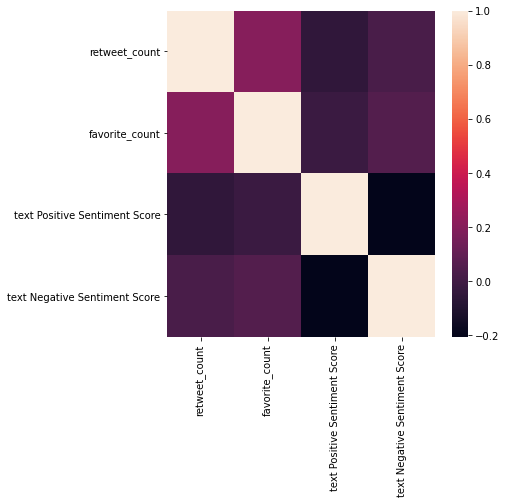

In [73]:
plt.figure(figsize= (6, 6))
sns.heatmap(features.corr())

In [74]:
 #Import english stop words
stopcorpus: typing.List = stopwords.words('english')

In [75]:
# Convert to lowercase, and remove stop words

def remove_links(text):
    # Remove any hyperlinks that may be in the text starting with http
    return re.sub(r"http\S+", "", text)

def style_text(text:str):
    # Convert to lowercase
    return text.lower()

def remove_words(text_data:str,list_of_words_to_remove: typing.List):
    # Remove all words as specified in a custom list of words
    return [item for item in text_data if item not in list_of_words_to_remove]

def collapse_list_to_string(string_list):
    # This is to join back together the text data into a single string
    return ' '.join(string_list)

def remove_apostrophes(text):
    # Remove any apostrophes as these are irrelavent in our word cloud
    text = text.replace("'", "")
    text = text.replace('"', "")
    text = text.replace('`', "")
    return text

def remove_others(text):
    
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Remove @mentions
    text = re.sub(r'#','',text) # Remove hashtag symbols
    text = re.sub(r'RT[\s]+','',text) # Remove retweets
    text = re.sub(r'Ukraine','',text) 
    text = re.sub(r'ukraine','',text) 
    text = re.sub(r'ukrainian','',text)
    text = re.sub(r'amp','',text)
    text = re.sub(r'rt','',text)
    text = re.sub(r'Russia','',text) 
    text = re.sub(r'russia','',text) 
    return text

In [76]:
tweet_sentiment['cleaned_text'] =tweet_sentiment.loc[:,'text'].astype(str).apply(remove_links)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(style_text)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(lambda x: remove_words(x.split(),stopcorpus))

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(collapse_list_to_string)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_apostrophes)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_others)

<ipython-input-76-397efa821a74>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-76-397efa821a74>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-76-397efa821a74>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-76-397efa8

In [77]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


tweet_sentiment['clean_lemmatized'] = tweet_sentiment['cleaned_text'].astype(str).apply(lemmatize_text)

tweet_sentiment['clean_lemmatized'] = tweet_sentiment['clean_lemmatized'].apply(collapse_list_to_string)

display(tweet_sentiment['clean_lemmatized'].head(5))

<ipython-input-77-3e2f8e3d0251>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-3e2f8e3d0251>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0                      true. n culture thinking forced s century despise anything ukrai…
1              also impoant remember israel enemy always dictatorship always cruel plan…
2              israel attacked numerically superior enemy still accused european left b…
3    would like bold connect letter writing intellectual lavrovs antisemitism. far reme…
4              make new enemies: sergei lavrov said fact president zelenskyy jewish not…
Name: clean_lemmatized, dtype: object

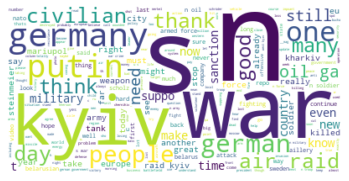

In [78]:
def plot_wordcloud(series,output_filename='wordcloud'):

    wordcloud = WordCloud(max_font_size=150, max_words=500, background_color="white").generate(' '.join(series.astype(str)))

    wordcloud.to_file(output_filename + '.png')

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")

plot_wordcloud(tweet_sentiment['clean_lemmatized'],'overall-wordcloud')

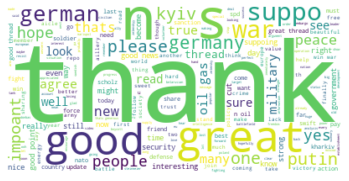

In [79]:
def plot_wordcloud_top_n(df,number_of_tweets,score_column,data_column,output_filename):
    sliced_df = df.nlargest(number_of_tweets,score_column)

    plot_wordcloud(sliced_df[data_column],output_filename)


plot_wordcloud_top_n(tweet_sentiment,500,'text Positive Sentiment Score','clean_lemmatized','positive-wordcloud')

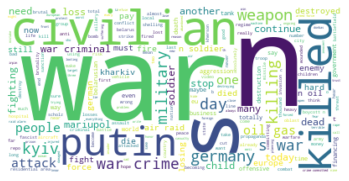

In [80]:
plot_wordcloud_top_n(tweet_sentiment,500,'text Negative Sentiment Score','clean_lemmatized','negative-wordcloud')

In [81]:
fig = px.line(anderstweets, x="time", y= anderstweets['retweet_count'])
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [82]:
df=anderstweets[['time', 'retweet_count','text Positive Sentiment Score','text Negative Sentiment Score']]
pos=anderstweets[['time', 'retweet_count','text Positive Sentiment Score']]
neg =anderstweets[['time', 'retweet_count','text Negative Sentiment Score']]
df[(df['time']>='2022-03-01') & (df['time']<='2022-04-01')]

,time,retweet_count,text Positive Sentiment Score,text Negative Sentiment Score
921,2022-03-31 14:34:29+00:00,503,0.062,0.172
922,2022-03-31 14:30:25+00:00,200,0.000,0.416
923,2022-03-31 14:30:07+00:00,663,0.145,0.000
924,2022-03-31 14:28:39+00:00,358,0.085,0.000
925,2022-03-31 14:10:32+00:00,85,0.199,0.185
...,...,...,...,...
2654,2022-03-01 03:56:17+00:00,1331,0.000,0.000
2655,2022-03-01 03:56:05+00:00,34958,0.000,0.000
2656,2022-03-01 03:55:08+00:00,25,0.000,0.000
2657,2022-03-01 03:54:00+00:00,90,0.000,0.100


In [83]:
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['time'], y=pos['text Positive Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['time'], y=neg['text Negative Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [84]:
anderstweets["is_viral"] = anderstweets.retweet_count.apply(
    lambda row: 1 if row >= anderstweets.retweet_count.mean()  else 0)

print(anderstweets.is_viral.value_counts())

0    2679
1     569
Name: is_viral, dtype: int64


In [85]:
anderstweets['tweet_length'] = anderstweets.apply(lambda tweet: len(tweet['text']), axis=1)
anderstweets["followers_count"] = anderstweets.apply(lambda tweet: tweet["followers_count"], axis=1)
anderstweets["friends_count"] = anderstweets.apply(lambda tweet: tweet["following"], axis=1)

anderstweets["hashtag_count"] = anderstweets.apply(lambda tweet: tweet.text.count("#"), axis=1)
anderstweets["link_count"] = anderstweets.apply(lambda tweet: tweet.text.count("http"), axis=1)
anderstweets["word_count"] = anderstweets.apply(lambda tweet: len(tweet.text.split()), axis=1)

def find_avg_word_length(str):
    #function to find average word length of a string
    sum = 0
    for i in range(0, len(str.split())):
        sum = sum + len(str.split()[i])
    avg = sum/len(str.split())
    return avg

anderstweets["avg_length_of_words"] = anderstweets.text.apply(find_avg_word_length)

In [86]:
labels = anderstweets[["is_viral"]]
features = anderstweets[["tweet_length", "followers_count", "friends_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features = scale(features, axis=0)

features2 = anderstweets[["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count"]]
scaled_features2 = scale(features2, axis=0)

features3 = anderstweets[["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features3 = scale(features3, axis=0)

print(features.loc[0])
print(scaled_features[0])

tweet_length                        140
followers_count                  245397
friends_count                     17219
text Positive Sentiment Score     0.121
text Negative Sentiment Score     0.233
Name: 0, dtype: object
[0.66892351 0.         0.         0.28627236 1.01811188]


In [87]:
train_data, test_data, train_labels, test_labels = train_test_split(scaled_features3, labels, 
                                                                    test_size = 0.2,
                                                                    random_state=1)

In [88]:


classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8430769230769231

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

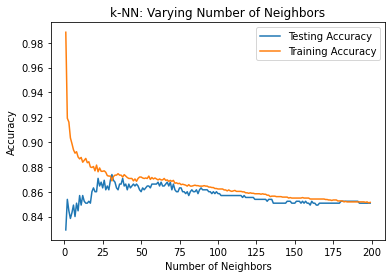

In [89]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 200)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
 # Setup a k-NN Classifier with k neighbors: knn
 knn = KNeighborsClassifier(n_neighbors=k)
 # Fit the classifier to the training data
 knn.fit(train_data, train_labels)
 
 #Compute accuracy on the training set
 train_accuracy[i] = knn.score(train_data, train_labels)
 #Compute accuracy on the testing set
 test_accuracy[i] = knn.score(test_data, test_labels)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [90]:
#lets find best_k

best_score = 0
best_k = 0

for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    if classifier.score(test_data, test_labels) > best_score:
        best_score = classifier.score(test_data, test_labels)
        best_k = k

print(best_k)
print(best_score)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

31
0.8738461538461538


In [95]:
anderstweets.to_csv('anderstweets')